# CW2: Human Resource Attrition Analytics, Chayutpong Prateepavanitch 

## Table of Links
### Table
| Description | Link |
| -- | -- |
| Reflective blog | https://ele.exeter.ac.uk/mod/oublog/viewpost.php?post=46482|
| | https://ele.exeter.ac.uk/mod/oublog/viewpost.php?post=46541|
| Chosen Dataset | IBM HR Analytics Dataset [https://www.kaggle.com/datasets/pavansubhasht/ibm-hr-analytics-attrition-dataset?resource=download]  |
| GitHub Link | https://github.com/Chayutpong-p/HR_Attrition_Management_Dashboard.git |

## Table of Contents
1. Introduction
2. Project Context
3. Aims, Objectives & Audience
4. Project Dashboard
5. Articulation of Decision-Making Process
6. Review of Analytics Methods Chosen
7. Review of Available Tools
8. Review of Chosen Datasets
9. Visualisation of Data with Accompanying Code
10. Reflective Evaluation
11. Conclusion
12. References


## 1. Introduction

In this report, I discuss the conception, design, and deployment of the Human Resource Attrition Analytics Dashboard designed to resolve companies’ continuous attrition issue. Employee attrition is the term used to describe employee leaving a company, involuntarily or willingly, leading to greater costs, disruptions and productivity declines. The dashboard provides Human Resource (HR) managers and business leaders with the ability to see what drives attrition and make proactive decisions based on this information.

The IBM HR Analytics Dataset was used for this project to bring analytic techniques and visualization principles to the data, which is turned into actionable HR information. The dashboard covers general trends, demographics, job satisfaction, and job-based metrics. With the Dash platform in Python, this report shows how data can be presented in an efficient way to facilitate management decisions and decrease employee turnover.


## 2. Project Context
Companies today work in a world where the talent pool is ever more competitive. Attrition is one of the biggest impact to the business because of the recruitment, onboarding and lost productivity that it causes. Analyzing and managing attrition patterns becomes increasingly crucial as organizations aim for workforce stability and productivity.

It was IBM HR Analytics Dataset chosen since it has a solid base for analysing attrition. It contains demographics, satisfaction, pay information, and work function. In exploring these, this research aims to:

- Identify the main drivers of employee attrition.

- Highlight trends and patterns in attrition rates across departments, genders, age groups, and job satisfaction scores.

- Provide actionable recommendations for HR managers to improve employee retention strategies.

This dashboard is created for the HR managers and C-suite leaders who need to plan and visualize how to effectively deal with attrition.

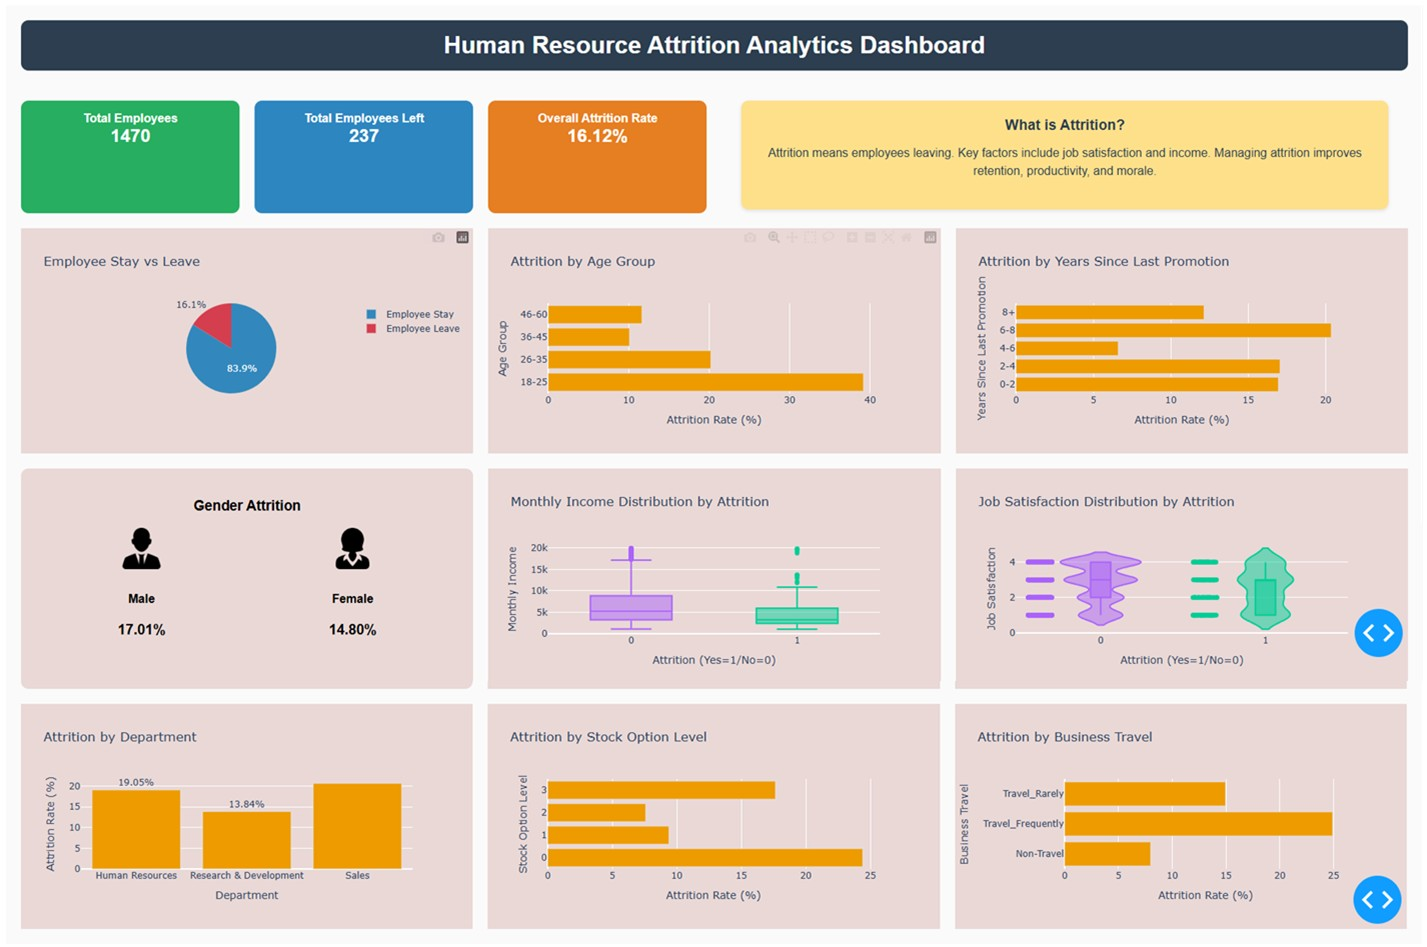

In [304]:
from IPython.display import Image, display

# Display the image from the raw link
display(Image("https://raw.githubusercontent.com/Chayutpong-p/HR_Attrition_Management_Dashboard/main/Dashboard%20Output.jpg"))


## 3. Aims, Objectives & Audience

**Aims**

The mission of the project is to develop an HR attrition dashboard, visualizing employee data, finding attrition reasons and providing actionable information for HR managers and business leaders.

**Objectives**

1. **Monitor Overall Attrition Trends**: Provide insights into attrition rates and the proportion of employees staying versus leaving and anyother factors.

2. **Analyze Attrition by Demographics**: Visualize attrition patterns across key demographic groups, including age, gender.

3. **Assess Income & Satisfaction Metrics**: Examine how job satisfaction and income influence attrition.

4. **Evaluate the Overlooked Factors**: Analyze stock level and business travel contributions to attrition.

5. **Identify Actionable Recommendations**: Highlight insights that HR managers can use to mitigate employee attrition and improve retention.

**Audience**

The primary audience for this dashboard includes:

1. **HR Managers**: To identify high-risk groups and prioritize retention strategies.

2. **Senior Executives**: To evaluate departmental performance and implement workforce policies.

The dashboard is built to be user-friendly and straightforward so that anyone with limited technical knowledge can still gain valuable insights without any data analysis experience.

## 4. Project Dashboard
This project delivers an interactive, web-based HR Management Dashboard built using the Dash Python framework. The dashboard presents key visualizations necessary for managerial decision-making. It highlights high-level trends and provides summarized insights. Designed for optimal perception and short-term memory, the dashboard aggregates and organizes information concisely, ensuring managers can quickly interpret patterns, anomalies, and key performance indicators to drive informed, strategic decisions effectively.

**Code Implementation**

In [305]:
from dash import Dash, dcc, html
from dash.dependencies import Input, Output
import pandas as pd
import plotly.express as px

# Load dataset
url = 'https://raw.githubusercontent.com/Chayutpong-p/HR_Attrition_Management_Dashboard/main/cleaned_hr_data.csv'
df = pd.read_csv(url)


In [306]:
import pandas as pd

# Decoding mappings
business_travel_mapping = {0: "Non-Travel", 1: "Travel_Rarely", 2: "Travel_Frequently"}
department_mapping = {0: "Sales", 1: "Research & Development", 2: "Human Resources"}
gender_mapping = {0: "Female", 1: "Male"}

# Apply Mappings to Dataset
df["BusinessTravel"] = df["BusinessTravel"].map(business_travel_mapping)
df["Department"] = df["Department"].map(department_mapping)
df["Gender"] = df["Gender"].map(gender_mapping)

In [307]:
# Total Employees, Attrition Numbers, and Attrition Rate
total_employees = df.shape[0]
total_attrition = df[df["Attrition"] == 1].shape[0]
attrition_rate = (total_attrition / total_employees) * 100

# Pie Chart Data (Stay vs Leave)
attrition_pie = df["Attrition"].value_counts(normalize=True) * 100

# Gender Attrition Rate
gender_attrition = df[df["Attrition"] == 1].groupby("Gender").size() / df.groupby("Gender").size() * 100

# Department and Job Role Attrition
department_attrition = df.groupby("Department")["Attrition"].mean() * 100
job_role_attrition = df[df["Attrition"] == 1].groupby(["Department", "JobRole"]).size() / df.groupby(["Department", "JobRole"]).size() * 100

# Age Group Attrition
age_bins = [18, 25, 35, 45, 60]
age_labels = ["18-25", "26-35", "36-45", "46-60"]
df["AgeGroup"] = pd.cut(df["Age"], bins=age_bins, labels=age_labels, right=False)
age_group_attrition = df[df["Attrition"] == 1].groupby("AgeGroup").size() / df.groupby("AgeGroup").size() * 100

# Years Since Last Promotion Attrition
promotion_bins = [0, 2, 4, 6, 8, df["YearsSinceLastPromotion"].max() + 1]
promotion_labels = ["0-2", "2-4", "4-6", "6-8", "8+"]
df["PromotionGroup"] = pd.cut(df["YearsSinceLastPromotion"], bins=promotion_bins, labels=promotion_labels, right=False)
promotion_attrition = df[df["Attrition"] == 1].groupby("PromotionGroup").size() / df.groupby("PromotionGroup").size() * 100

# Stock Level Attrition
stock_level_attrition = df[df["Attrition"] == 1].groupby("StockOptionLevel").size() / df.groupby("StockOptionLevel").size() * 100

# Business Travel Attrition
business_travel_attrition = df[df["Attrition"] == 1].groupby("BusinessTravel").size() / df.groupby("BusinessTravel").size() * 100

# Monthly Income Distribution by Attrition
monthly_income_distribution = df.groupby("Attrition")["MonthlyIncome"].describe()
monthly_income_stats = {
    "Attrition 0": monthly_income_distribution.loc[0],
    "Attrition 1": monthly_income_distribution.loc[1]
}

# Job Satisfaction Distribution by Attrition
job_satisfaction_distribution = df.groupby("Attrition")["JobSatisfaction"].describe()
job_satisfaction_stats = {
    "Attrition 0": job_satisfaction_distribution.loc[0],
    "Attrition 1": job_satisfaction_distribution.loc[1]
}

C:\Users\User\AppData\Local\Temp\ipykernel_43524\2508590157.py:20: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.

C:\Users\User\AppData\Local\Temp\ipykernel_43524\2508590157.py:20: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.

C:\Users\User\AppData\Local\Temp\ipykernel_43524\2508590157.py:26: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.

C:\Users\User\AppData\Local\Temp\ipykernel_43524\2508590157.py:26: FutureWarning:

Th

In [308]:

# 1. Pie Chart: Stay vs Leave
fig_pie = px.pie(
    names=["Employee Stay", "Employee Leave"],
    values=attrition_pie.values,
    color=["Employee Stay", "Employee Leave"],
    color_discrete_map={"Employee Stay": "#3288bd", "Employee Leave": "#d53e4f"},
    title="Employee Stay vs Leave"
)
fig_pie.update_layout(plot_bgcolor="#E9D8D6", paper_bgcolor="#E9D8D6")

# 2. Bar Chart: Gender Attrition
fig_gender_attrition = px.bar(
    x=gender_attrition.index,
    y=gender_attrition.values,
    labels={"x": "Gender", "y": "Attrition Rate (%)"},
    title="Attrition by Gender",
    text=gender_attrition.values,
    color_discrete_sequence=["#EE9B00"]
)
fig_gender_attrition.update_traces(texttemplate='%{text:.2f}%', textposition='outside')
fig_gender_attrition.update_layout(plot_bgcolor="#E9D8D6", paper_bgcolor="#E9D8D6")

# 3. Bar Chart: Attrition by Department
fig_department_bar = px.bar(
    x=department_attrition.index,
    y=department_attrition.values,
    labels={"x": "Department", "y": "Attrition Rate (%)"},
    title="Attrition by Department",
    text=department_attrition.values,
    color_discrete_sequence=["#EE9B00"]
)
fig_department_bar.update_traces(texttemplate='%{text:.2f}%', textposition='outside')
fig_department_bar.update_layout(plot_bgcolor="#E9D8D6", paper_bgcolor="#E9D8D6")

# 4. Bar Chart: Job Role Attrition
fig_job_role_attrition = px.bar(
    job_role_attrition.reset_index(),
    x="JobRole",
    y=0,
    color_discrete_sequence=["#EE9B00"],
    labels={"JobRole": "Job Role", 0: "Attrition Rate (%)", "Department": "Department"},
    title="Attrition by Job Role",
    text=0,
    barmode="group"
)
fig_job_role_attrition.update_traces(texttemplate='%{text:.2f}%', textposition='outside')
fig_job_role_attrition.update_layout(plot_bgcolor="#E9D8D6", paper_bgcolor="#E9D8D6")

# 5. Horizontal Bar Chart: Attrition by Age Group
fig_age_group_bar = px.bar(
    y=age_group_attrition.index,
    x=age_group_attrition.values,
    orientation="h",
    labels={"x": "Attrition Rate (%)", "y": "Age Group"},
    title="Attrition by Age Group",
    color_discrete_sequence=["#EE9B00"]
)
fig_age_group_bar.update_layout(plot_bgcolor="#E9D8D6", paper_bgcolor="#E9D8D6")

# 6. Horizontal Bar Chart: Attrition by Years Since Last Promotion
fig_promotion_bar = px.bar(
    y=promotion_attrition.index,
    x=promotion_attrition.values,
    orientation="h",
    labels={"x": "Attrition Rate (%)", "y": "Years Since Last Promotion"},
    title="Attrition by Years Since Last Promotion",
    color_discrete_sequence=["#EE9B00"]
)
fig_promotion_bar.update_layout(plot_bgcolor="#E9D8D6", paper_bgcolor="#E9D8D6")

# 7. Horizontal Bar Chart: Attrition by Stock Level
fig_stock_level_bar = px.bar(
    y=stock_level_attrition.index,
    x=stock_level_attrition.values,
    orientation="h",
    labels={"x": "Attrition Rate (%)", "y": "Stock Option Level"},
    title="Attrition by Stock Option Level",
    color_discrete_sequence=["#EE9B00"]
)
fig_stock_level_bar.update_layout(plot_bgcolor="#E9D8D6", paper_bgcolor="#E9D8D6")

# 8. Horizontal Bar Chart: Attrition by Business Travel
fig_business_travel_bar = px.bar(
    y=business_travel_attrition.index,
    x=business_travel_attrition.values,
    orientation="h",
    labels={"x": "Attrition Rate (%)", "y": "Business Travel"},
    title="Attrition by Business Travel",
    color_discrete_sequence=["#EE9B00"]
)
fig_business_travel_bar.update_layout(plot_bgcolor="#E9D8D6", paper_bgcolor="#E9D8D6")

# 9. Box Plot: Monthly Income Distribution by Attrition
fig_box_income = px.box(
    df,
    x="Attrition",
    y="MonthlyIncome",
    color="Attrition",
    labels={"Attrition": "Attrition (Yes=1/No=0)", "MonthlyIncome": "Monthly Income"},
    title="Monthly Income Distribution by Attrition",
    color_discrete_map={"1": "#d53e4f", "0": "#3288bd"}  # Yes: Orange-Red, No: Teal
)
fig_box_income.update_layout(plot_bgcolor="#E9D8D6", paper_bgcolor="#E9D8D6",showlegend=False)

# 10. Violin Plot: Job Satisfaction Distribution by Attrition
fig_violin_satisfaction = px.violin(
    df,
    x="Attrition",
    y="JobSatisfaction",
    color="Attrition",
    box=True,
    points="all",
    labels={"Attrition": "Attrition (Yes=1/No=0)", "JobSatisfaction": "Job Satisfaction"},
    title="Job Satisfaction Distribution by Attrition",
    color_discrete_map={"1": "#d53e4f", "0": "#3288bd"}  # Yes: Orange-Red, No: Teal
)
fig_violin_satisfaction.update_layout(plot_bgcolor="#E9D8D6", paper_bgcolor="#E9D8D6",showlegend=False)
_ = fig_violin_satisfaction

In [309]:
# Initialize Dash app
app = Dash(__name__)

In [310]:
app.layout = html.Div(
    style={"fontFamily": "Arial, sans-serif", "backgroundColor": "#FAFAFA", "padding": "20px"},
    children=[
        # Dashboard Title
        html.Div(
            style={
                "backgroundColor": "#2C3E50",
                "padding": "15px",
                "borderRadius": "10px",
                "color": "#FFF",
                "textAlign": "center",
                "gridColumn": "1 / 7",
                "marginBottom": "20px"
            },
            children=html.H1(
                "Human Resource Attrition Analytics Dashboard",
                style={"margin": "0", "fontSize": "2rem", "fontWeight": "bold"}
            )
        ),

        # GRID CONTAINER
        html.Div(
            style={
                "display": "grid",
                "gridTemplateColumns": "repeat(6, 1fr)",
                "gridTemplateRows": "auto 150px 300px 300px 300px",  
                "gap": "20px"
            },
            children=[
                # KPI Cards
                html.Div(
                    style={"gridColumn": "1 / 4", "gridRow": "2", "display": "flex", "gap": "20px"},
                    children=[
                        # Total Employees Card
                        html.Div(
                            style={
                                "backgroundColor": "#27AE60",
                                "padding": "15px",
                                "borderRadius": "10px",
                                "color": "#FFF",
                                "textAlign": "center",
                                "alignItems": "center",
                                "flex": "1"
                            },
                            children=[
                                html.H4("Total Employees", style={"margin": "0", "fontWeight": "bold"}),
                                html.H2(f"{total_employees}", style={"margin": "0", "fontSize": "1.5rem"})
                            ]
                        ),
                        # Total Employees Left Card
                        html.Div(
                            style={
                                "backgroundColor": "#2E86C1",
                                "padding": "15px",
                                "borderRadius": "10px",
                                "color": "#FFF",
                                "textAlign": "center",
                                "alignItems": "center",
                                "flex": "1"
                            },
                            children=[
                                html.H4("Total Employees Left", style={"margin": "0", "fontWeight": "bold"}),
                                html.H2(f"{total_attrition}", style={"margin": "0", "fontSize": "1.5rem"})
                            ]
                        ),
                        # Attrition Rate Card
                        html.Div(
                            style={
                                "backgroundColor": "#E67E22",
                                "padding": "15px",
                                "borderRadius": "10px",
                                "color": "#FFF",
                                "textAlign": "center",
                                "alignItems": "center",
                                "flex": "1"
                            },
                            children=[
                                html.H4("Overall Attrition Rate", style={"margin": "0", "fontWeight": "bold"}),
                                html.H2(f"{attrition_rate:.2f}%", style={"margin": "0", "fontSize": "1.5rem"})
                            ]
                        )
                    ]
                ),

                # Text Component
                html.Div(
                    style={
                        "gridColumn": "4 / 7",         
                        "gridRow": "2",
                        "backgroundColor": "#fee08b",
                        "padding": "20px",
                        "borderRadius": "10px",
                        "color": "#2C3E50",
                        "boxShadow": "0px 2px 5px rgba(0, 0, 0, 0.1)",
                        "lineHeight": "1.5",
                        "display": "flex",
                        "justifyContent": "center",
                        "alignItems": "center",
                        "margin": "0 auto",
                        "width": "90%",
                        "height": "70%",
                        "textAlign": "center"
                    },
                    children=[
                        html.Div([
                            html.H4("What is Attrition?", style={"marginTop": "-20px", "marginBottom": "10px", "fontWeight": "bold", "fontSize": "1.2rem"}),
                            html.P(
                                "Attrition means employees leaving. Key factors include job satisfaction and income. Managing attrition improves retention, productivity, and morale.",
                                style={"margin": "0", "fontSize": "1rem"}
                            )
                        ])
                    ]
                ),

                # Pie Chart 
                dcc.Graph(figure=fig_pie, style={"gridColumn": "1 / 3", "gridRow": "3", "height" : "100%", "width" : "100%"}),

                # Gender Attrition 
                html.Div(
                    style={"gridColumn": "1 / 3", "gridRow": "4", "backgroundColor": "#E9D8D6", "padding": "20px", "borderRadius": "10px", "color": "#000000"},
                    children=[
                        html.H3("Gender Attrition", style={"textAlign": "center"}),
                        html.Div(
                            style={"display": "flex", "justifyContent": "space-around"},
                            children=[
                                html.Div(
                                    style={"textAlign": "center"},
                                    children=[
                                        html.Img(src="/assets/male_icon.png", style={"width": "55px", "height": "55px", "marginBottom": "5px"}),
                                        html.H4("Male"),
                                        html.H3(f"{gender_attrition['Male']:.2f}%")
                                    ]
                                ),
                                html.Div(
                                    style={"textAlign": "center"},
                                    children=[
                                        html.Img(src="/assets/female_icon.png", style={"width": "55px", "height": "55px", "marginBottom": "5px"}),
                                        html.H4("Female"),
                                        html.H3(f"{gender_attrition['Female']:.2f}%")
                                    ]
                                )
                            ]
                        )
                    ]
                ),

                # Department Chart 
                dcc.Graph(figure=fig_department_bar, style={"gridColumn": "1 / 3", "gridRow": "5"}),

                # Age Group Chart 
                dcc.Graph(figure=fig_age_group_bar, style={"gridColumn": "3 / 5", "gridRow": "3"}),

                # Promotion Year Chart
                dcc.Graph(figure=fig_promotion_bar, style={"gridColumn": "5 / 7", "gridRow": "3"}),

                # Income Chart 
                dcc.Graph(figure=fig_box_income, style={"gridColumn": "3 / 5", "gridRow": "4"}),

                # Job Satisfaction Chart 
                dcc.Graph(figure=fig_violin_satisfaction, style={"gridColumn": "5 / 7", "gridRow": "4"}),

                # Stock Level Chart
                dcc.Graph(figure=fig_stock_level_bar, style={"gridColumn": "3 / 5", "gridRow": "5"}),

                # Business Travel Chart 
                dcc.Graph(figure=fig_business_travel_bar, style={"gridColumn": "5 / 7", "gridRow": "5"})
            ]
        )
    ]
)

In [311]:
# Run the Dash app
if __name__ == "__main__":
    app.run_server(debug=True, port=8090)

## 5. Articulation of Decision-Making Process
The development of this dashboard was guided by structured decision-making steps:

1. **Data Exploration and Cleaning**: Raw data was analyzed for key trends in employee attrition, performance, and demographics, identifying correlations, and patterns across factors like age, department, and years after promotion, providing insights for further analysis.

2. **Framework Selection**: Python's Dash was chosen over tools like Tableau for its flexibility in creating interactive, customizable dashboards.

3. **Visualization Principles**: Principles such as clarity, simplicity, and accessibility from Edward Tufte and Alberto Cairo were applied to ensure the dashboard was user-friendly and insightful.

4. **Iterative Development**: Visualizations were refined through multiple iterations, balancing aesthetic appeal and functional insights like hoving over for accurate detail.

## 6. Review of Analytics Methods Chosen
The following methods were employed:

1. **Descriptive Statistics**: Summarized key metrics like attrition rates, income distributions and many more.

2. **Exploratory Data Analysis (EDA)**: Used correlation heatmaps and visual distributions to uncover relationships between variables.

3. **Categorical Analysis**: Bar charts and pie charts illustrated attrition trends across departments, genders, satisfaction scores and another interesting factors.

## 7. Review of Available Tools
1. **Dash**: Chosen for its interactivity and customization.

2. **Tableau**: Considered for its simplicity but not used due to limited coding benefits.

3. **Streamlit**: Explored as an alternative but lacked advanced layout control.

## 8. Review of Chosen Datasets
The IBM HR Analytics Employee Attrition and Performance Dataset is widely recognized in the field of People Analytics for its comprehensive and structured information. It contains 1,470 rows and 35 columns and provides a holistic overview of employee demographics, job satisfaction, compensation, and performance metrics. The dataset includes variables such as:

- **Demographic Data**: Age, Gender, Marital Status, Education Field.

- **Job-Related Metrics**: Job Role, Department, Monthly Income, Overtime, and Job Level.

- **Satisfaction Scores**: Job Satisfaction and Environment Satisfaction.

- **Performance and Tenure**: Years in Current Role, Years at Company, Training Time, and Percent Salary Hike.

This dataset is highly suitable for attrition analysis as it combines HRIS data with engagement survey results, enabling both descriptive and predictive analysis. For example, it allows the identification of differences between employees who stayed and those who left based on factors like job satisfaction, income, and overtime.

## 9. Visualisation of Data with Accompanying Code
The following analysis highlights key components extracted from the HR Management Dashboard, showcasing the most valuable insights for the report. These visualizations provide an in-depth understanding of employee attrition, focusing on overall retention rates, department-wise trends, years after promotion, and job satisfaction.

In [312]:
from dash import Dash, dcc, html
from dash.dependencies import Input, Output
import pandas as pd
import plotly.express as px

# Load dataset 
url = 'https://raw.githubusercontent.com/Chayutpong-p/HR_Attrition_Management_Dashboard/main/cleaned_hr_data.csv'
df = pd.read_csv(url)

# Decoding mappings
department_mapping = {0: "Sales", 1: "Research & Development", 2: "Human Resources"}

# Apply Mappings to Dataset
df["Department"] = df["Department"].map(department_mapping)

# Pie Chart Data (Stay vs Leave)
attrition_pie = df["Attrition"].value_counts(normalize=True) * 100

# Department and Job Role Attrition
department_attrition = df.groupby("Department")["Attrition"].mean() * 100
job_role_attrition = df[df["Attrition"] == 1].groupby(["Department", "JobRole"]).size() / df.groupby(["Department", "JobRole"]).size() * 100

# Age Group Attrition
age_bins = [18, 25, 35, 45, 60]
age_labels = ["18-25", "26-35", "36-45", "46-60"]
df["AgeGroup"] = pd.cut(df["Age"], bins=age_bins, labels=age_labels, right=False)
age_group_attrition = df[df["Attrition"] == 1].groupby("AgeGroup").size() / df.groupby("AgeGroup").size() * 100

# Years Since Last Promotion Attrition
promotion_bins = [0, 2, 4, 6, 8, df["YearsSinceLastPromotion"].max() + 1]
promotion_labels = ["0-2", "2-4", "4-6", "6-8", "8+"]
df["PromotionGroup"] = pd.cut(df["YearsSinceLastPromotion"], bins=promotion_bins, labels=promotion_labels, right=False)
promotion_attrition = df[df["Attrition"] == 1].groupby("PromotionGroup").size() / df.groupby("PromotionGroup").size() * 100

# Job Satisfaction Distribution by Attrition
job_satisfaction_distribution = df.groupby("Attrition")["JobSatisfaction"].describe()
job_satisfaction_stats = {
    "Attrition 0": job_satisfaction_distribution.loc[0],
    "Attrition 1": job_satisfaction_distribution.loc[1]
}

C:\Users\User\AppData\Local\Temp\ipykernel_43524\2335320730.py:27: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.

C:\Users\User\AppData\Local\Temp\ipykernel_43524\2335320730.py:27: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.

C:\Users\User\AppData\Local\Temp\ipykernel_43524\2335320730.py:33: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.

C:\Users\User\AppData\Local\Temp\ipykernel_43524\2335320730.py:33: FutureWarning:

Th

In [313]:
# 1. Pie Chart: Stay vs Leave
fig_pie = px.pie(
    names=["Employee Stay", "Employee Leave"],
    values=attrition_pie.values,
    color=["Employee Stay", "Employee Leave"],
    color_discrete_map={"Employee Stay": "#3288bd", "Employee Leave": "#d53e4f"},
    title="Employee Stay vs Leave"
)
fig_pie.update_layout(plot_bgcolor="#E9D8D6", paper_bgcolor="#E9D8D6")
fig_pie.show()

**Insight**: 83.9% of employees stay, while 16.1% leave. This indicates overall good retention but highlights a need to understand the drivers of attrition among the leaving employees.

In [314]:
# 3. Bar Chart: Attrition by Department
fig_department_bar = px.bar(
    x=department_attrition.index,
    y=department_attrition.values,
    labels={"x": "Department", "y": "Attrition Rate (%)"},
    title="Attrition by Department",
    text=department_attrition.values,
    color_discrete_sequence=["#EE9B00"]
)
fig_department_bar.update_traces(texttemplate='%{text:.2f}%', textposition='outside')
fig_department_bar.update_layout(plot_bgcolor="#E9D8D6", paper_bgcolor="#E9D8D6")
fig_department_bar.show()

**Insight**: Human Resources and Sales have the highest attrition rates at 19.05% and 20.63%, followed by Research & Development at 13.84%. Departments like HR and Sales may need targeted interventions to reduce turnover, such as addressing workload, compensation, or job satisfaction.

In [315]:
# 6. Horizontal Bar Chart: Attrition by Years Since Last Promotion
fig_promotion_bar = px.bar(
    y=promotion_attrition.index,
    x=promotion_attrition.values,
    orientation="h",
    labels={"x": "Attrition Rate (%)", "y": "Years Since Last Promotion"},
    title="Attrition by Years Since Last Promotion",
    color_discrete_sequence=["#EE9B00"]
)
fig_promotion_bar.update_layout(plot_bgcolor="#E9D8D6", paper_bgcolor="#E9D8D6")
fig_promotion_bar.show()

**Insight**: Employees with 6-8 years since their last promotion show the highest attrition rate, followed by 0-2 years and 4-6 years. This suggests that a lack of career advancement opportunities drives attrition, particularly after several years, indicating the need for improved promotion pathways.

In [316]:
# 6. Violin Plot: Job Satisfaction Distribution by Attrition
fig_violin_satisfaction = px.violin(
    df,
    x="Attrition",
    y="JobSatisfaction",
    color="Attrition",
    box=True,
    points="all",
    labels={"Attrition": "Attrition (Yes=1/No=0)", "JobSatisfaction": "Job Satisfaction"},
    title="Job Satisfaction Distribution by Attrition",
    color_discrete_map={"1": "#d53e4f", "0": "#3288bd"}  
)
fig_violin_satisfaction.update_layout(plot_bgcolor="#E9D8D6", paper_bgcolor="#E9D8D6", showlegend=False)
fig_violin_satisfaction.show()

**Insight**: Employees who left the company generally report lower job satisfaction compared to those who stayed.
The job satisfaction scores are concentrated in lower ranges (1-2) for employees who left, suggesting dissatisfaction is a major contributor to attrition.

**To be conclude**
The analysis reveals that job satisfaction, time since last promotion, and department significantly impact attrition. Employees in HR and Sales, particularly those without recent promotions and reporting low satisfaction, are at higher risk of leaving. Organizations should focus on improving promotion opportunities, addressing department-specific concerns, and enhancing job satisfaction to improve retention.

## 10. Reflective Evaluation
This project introduced me to new tools and concepts, requiring me to learn and adapt quickly. Dash was entirely unfamiliar, and I struggled with creating interactivity and customizing the layout. Data preprocessing posed its own challenges, particularly encoding categorical variables. Iteratively refining visualizations also taught me the importance of balancing clarity with complexity. Despite these challenges, I developed critical problem-solving skills, grew more confident with Python's visualization libraries, and gained valuable experience working on real-world HR analytics problems. The ability to create a functional, interactive dashboard was a significant milestone in my learning journey.

## 11. Conclusion
The Human Resource Attrition Analytics Dashboard effectively visualizes key insights into employee attrition. It highlights critical trends in demographics, satisfaction metrics, and job-specific factors, empowering HR professionals to make data-driven decisions. This project strengthened my analytical and technical skills, showcasing the value of combining data analysis with clear, interactive visualizations to address organizational challenges.

## 12. References

Cairo, A. (2016). The Truthful Art: Data, Charts, and Maps for Communication. New Riders.

Few, S. (2012). Show Me the Numbers: Designing Tables and Graphs to Enlighten (2nd ed.). Analytics Press.

IBM. (2021). IBM HR Analytics Employee Attrition & Performance Dataset. Retrieved from Kaggle: https://www.kaggle.com/datasets/pavansubhasht/ibm-hr-analytics-attrition-dataset

Tufte, E. R. (2001). The Visual Display of Quantitative Information (2nd ed.). Graphics Press.